In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
#Loading Data
df = pd.read_csv('cars.csv')

In [5]:
# Explore data
print(df.head())

   Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1   Toyota  Corolla  2018              50000    Petrol       Manual   
1       2    Honda    Civic  2019              40000    Petrol    Automatic   
2       3     Ford  Mustang  2017              20000    Petrol    Automatic   
3       4   Maruti    Swift  2020              30000    Diesel       Manual   
4       5  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  
0      First       15    1498    108      5   800000  
1     Second       17    1597    140      5  1000000  
2      First       10    4951    395      4  2500000  
3      Third       23    1248     74      5   600000  
4     Second       18    1999    194      5   850000  


In [6]:
print(df.isna().sum())

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [7]:
# Defining features and target
features = ['Brand', 'Model', 'Year', 'Kilometers_Driven',
            'Fuel_Type', 'Transmission', 'Owner_Type',
            'Mileage', 'Engine', 'Power', 'Seats']
target = 'Price'

In [8]:
# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Printing the shapes of features and target.
print(X.shape)
print(y.shape)

(100, 11)
(100,)


In [10]:
# Building the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Brand', 'Model', 'Fuel_Type', 'Transmission'])
    ]
)

In [12]:
# Building the pipeline with linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [13]:
# Train pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine',
                                                   'Power']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Model',
                                                   'Fuel_Type',
                                                   'Transmission'])])),
                ('regressor', LinearRegression())])

In [15]:
# Predicting on the test set
y_pred = pipeline.predict(X_test)
print(y_pred)

[1289080.0957413   699999.69159755 1299996.67579475 1289080.0957413
  850003.07159428 1064544.98875711 1018398.93389844  499996.89368595
 2395679.40331101  863576.67203921 2566394.29407148  599999.05774388
  499996.32432681  700000.12576945  499998.6302843  1548010.56430379
 4000005.91509906 1064544.98875711  766459.51257698  800007.38958358]


In [16]:
# Evaluating model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}")
print(f"r2_score: {r2}")
print(f"MAE: {mae}")

MSE: 63040194039.39286
r2_score: 0.9229196135729133
MAE: 149688.5390774363


In [17]:
# Performing Cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [-3.38409820e+10 -4.11854661e+10 -6.00162138e+10 -3.23468114e+10
 -7.84049879e+10]


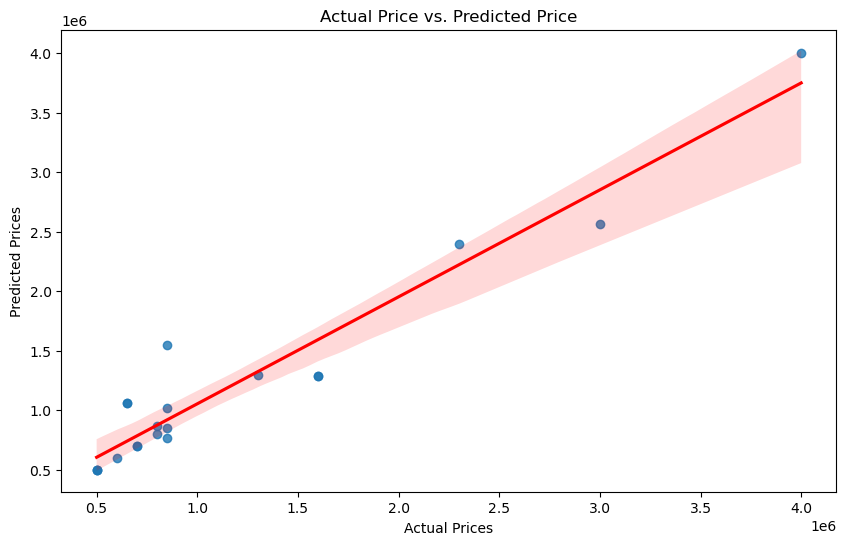

In [18]:
# Plotting actual vs. predicted prices
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, line_kws={'color':'red'})
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs. Predicted Price')
plt.show()

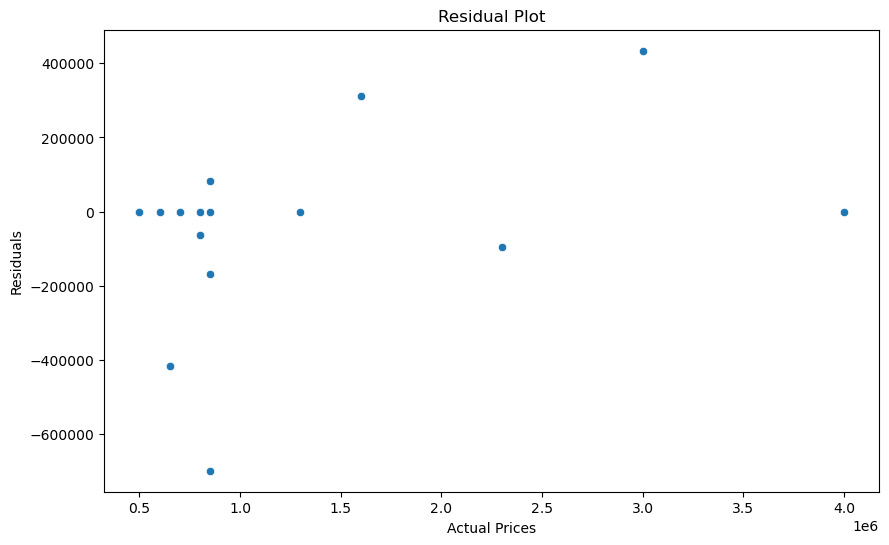

In [20]:
# Plotting residuals
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_test - y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

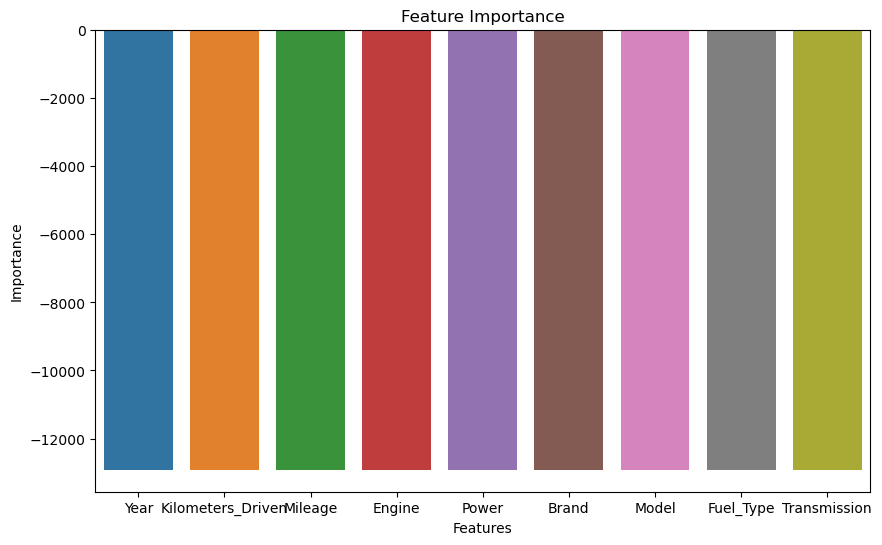

In [24]:
# Plotting feature importance (coefficients)
coefficients = pipeline.named_steps['regressor'].coef_
num_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
cat_features = pipeline.named_steps['preprocessor'].transformers_[1][2]
feature_names = num_features + cat_features
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients[0]})
plt.figure(figsize=(10,6))
sns.barplot(x='Feature', y='Importance', data=feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [27]:
# Making predictions on a single data point
single_datapoint = X_test.iloc[[19]]
print(single_datapoint)
y_single_pred = pipeline.predict(single_datapoint)
print(f'Price: {y_single_pred}')

      Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
31  Hyundai  Elantra  2017              32000    Diesel    Automatic   

   Owner_Type  Mileage  Engine  Power  Seats  
31     Second       22    1582    126      5  
Price: [800007.38958358]
